# 5EL272 - Lab1 Adversarial Attacks
Umeå University - Alexander Nilsson

## Part 1. 
> This blog article and source code describes how I trained a model for Traffic Sign Recognition through fine-tuning a pretrained MobileNetV3 Large model

> https://debuggercafe.com/traffic-sign-recognition-using-pytorch-and-deep-learning/

### Set up

getting the files from my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


navigating to the right directory

In [ ]:
cd /content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/src

/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/src


### Training the model

In [ ]:
!python train.py --pretrained --fine-tune --epochs 75 --learning-rate 0.0001

Streaming output truncated to the last 5000 lines.
Accuracy of class 00014: 100.0
Accuracy of class 00015: 100.0
Accuracy of class 00016: 100.0
Accuracy of class 00017: 100.0
Accuracy of class 00018: 100.0
Accuracy of class 00019: 100.0
Accuracy of class 00020: 100.0
Accuracy of class 00021: 100.0
Accuracy of class 00022: 100.0
Accuracy of class 00023: 100.0
Accuracy of class 00024: 100.0
Accuracy of class 00025: 100.0
Accuracy of class 00026: 100.0
Accuracy of class 00027: 100.0
Accuracy of class 00028: 100.0
Accuracy of class 00029: 100.0
Accuracy of class 00030: 100.0
Accuracy of class 00031: 100.0
Accuracy of class 00032: 100.0
Accuracy of class 00033: 100.0
Accuracy of class 00034: 100.0
Accuracy of class 00035: 100.0
Accuracy of class 00036: 100.0
Accuracy of class 00037: 100.0
Accuracy of class 00038: 100.0
Accuracy of class 00039: 100.0
Accuracy of class 00040: 100.0
Accuracy of class 00041: 100.0
Accuracy of class 00042: 100.0


Training loss: 0.021, training acc: 99.382
Valid

### Results:

In [ ]:
cd /content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/outputs

/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/outputs


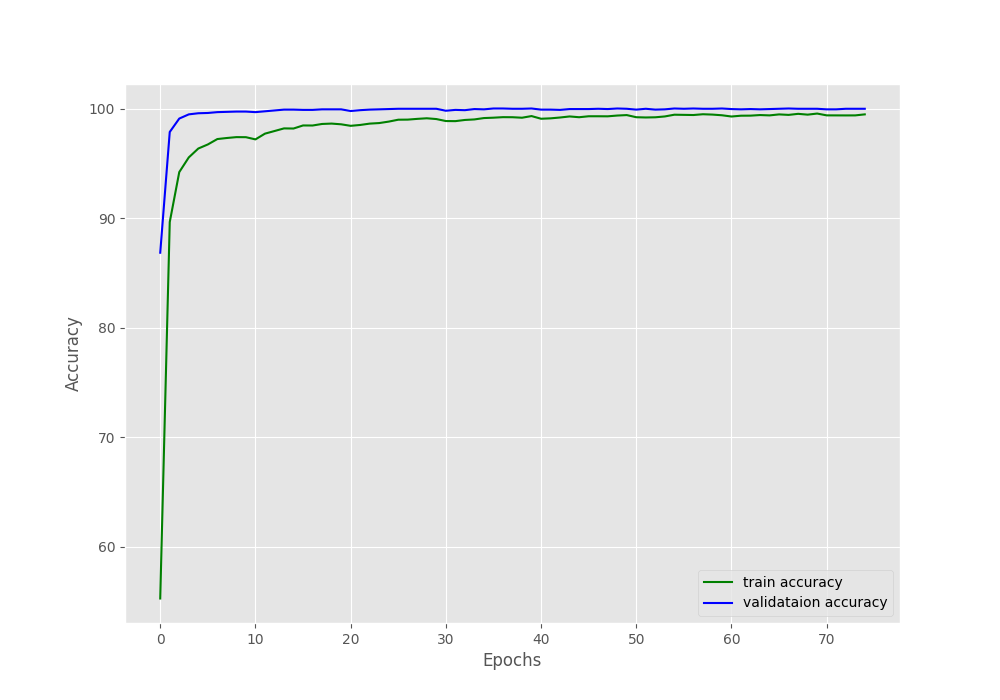

In [ ]:
from IPython import display
display.Image("/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/outputs/accuracy.png")

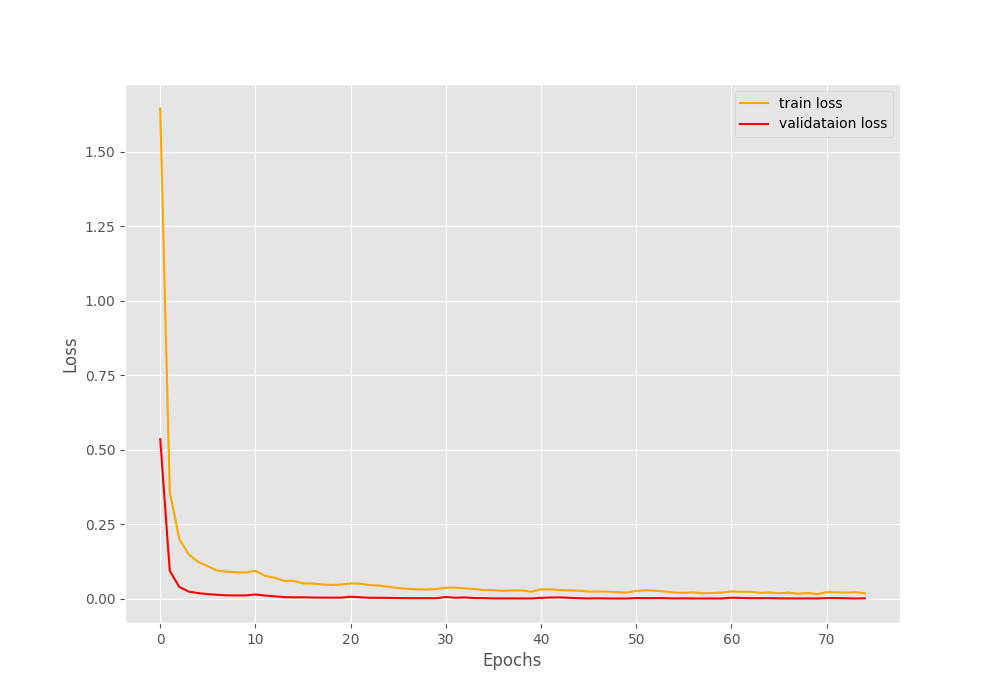

In [ ]:
display.Image("/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/outputs/loss.png")

##Part 2. 


>Following the steps in "Chapter 3 - Adversarial examples, solving the inner maximization" in the tutorial "Adversarial Robustness - Theory and Practice" 2018 to create attack images:

>https://adversarial-ml-tutorial.org/adversarial_examples/

>I tried the following attacks on my traffic sign classifier: 

>2.1 Untargeted attack using Fast Gradient Sign Method (FGSM), using the function fgsm().

>2.2 Untargeted attack using Projected Gradient Descent, using the function pgd_linf() (use the Projected Steepest Descent variant to accelerate the process).

>2.3 Targeted attack using Projected Gradient Descent, using the function pgd_linf_targ(), which aims to maximize logit of the target class y_targ and minimize logit of the true class y. You may choose any target class, but I suggest using "Speed Limit".

>2.4 Targeted attack using Projected Gradient Descent, using the function pgd_linf_targ2(), which aims to maximize logit of the target class y_targ and minimize logit of all the other classes y'. For each attack, report the accuracy of the attacked classifier on the testset, and show visualization of a few examples of successful attack (original image and attacked image).

### Load the model

In [ ]:
import torchvision.models as models
import torch.nn as nn
def build_model(pretrained=True, fine_tune=False, num_classes=10):
    if pretrained:
        print('[INFO]: Loading pre-trained weights')
    else:
        print('[INFO]: Not loading pre-trained weights')
        
    model = models.mobilenet_v3_small(pretrained=pretrained)

    if fine_tune:
        print('[INFO]: Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    elif not fine_tune:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False
    # Change the final classification head.
    model.classifier[3] = nn.Linear(in_features=1024, out_features=num_classes)
    return model


In [ ]:
import torch
device = ('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model.
model = build_model(
          pretrained = True,
          fine_tune = True,
          num_classes=43
          ).to(device)

[INFO]: Loading pre-trained weights


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

[INFO]: Fine-tuning all layers...


In [ ]:
cd /content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/

/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB


    Function to save the trained model to disk.
    """
    torch.save({
        'epoch': epochs,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': criterion,
    }, f"../outputs/model.pth")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
checkpoint = torch.load('/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/model.pth',map_location=torch.device(device))

In [ ]:
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
#print(model)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

### Load The data

we need a test loader to run the code given in the guide

In [ ]:
cd /content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/src

/content/drive/Othercomputers/My laptop/Skrivbord/GTSRB/src


In [ ]:
import torch
import argparse
import torch.nn as nn
import torch.optim as optim
import time
from tqdm.auto import tqdm
from model import build_model
from datasets import get_datasets, get_data_loaders
from utils import save_model, save_plots

valid_loader is used the same way as test loader from the example code

In [ ]:
    dataset_train, dataset_valid, dataset_classes = get_datasets()
    print(f"[INFO]: Number of training images: {len(dataset_train)}")
    print(f"[INFO]: Number of validation images: {len(dataset_valid)}")
    print(f"[INFO]: Class names: {dataset_classes}\n")
    # Load the training and validation data loaders.
    train_loader, valid_loader = get_data_loaders(dataset_train, dataset_valid)

[INFO]: Number of training images: 35289
[INFO]: Number of validation images: 3920
[INFO]: Class names: ['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042']



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#train loader is used the same way valid_loader is used in our code
test_loader = valid_loader

### Some usefull functions

In [ ]:
#device 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

the plot function

In [ ]:
from matplotlib import pyplot as plt
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    break
    
def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()


function to check how well our model handles the different adversial attacks 

In [ ]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        loss = nn.CrossEntropyLoss()(yp,y)
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

### 2.1 Untargeted attack using Fast Gradient Sign Method (FGSM), using the function fgsm().




In [ ]:
def fgsm(model, X, y, epsilon):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    loss = nn.CrossEntropyLoss()(model(X + delta), y)
    loss.backward()
    return epsilon * delta.grad.detach().sign()

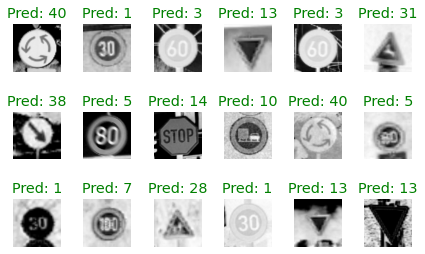

In [ ]:
### Illustrate original predictions
yp = model(X)
plot_images(X, y, yp, 3, 6)

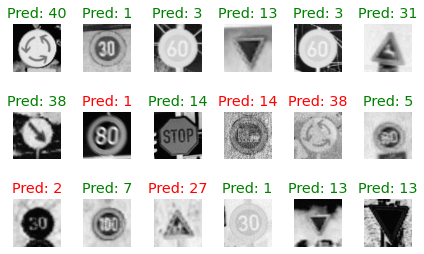

In [ ]:
### Illustrate attacked images
delta = fgsm(model, X, y, 0.1)
yp = model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

test errors of our classifiers when evaluating against against the FGSM adversarial attack:

In [ ]:
print("model:", epoch_adversarial(model, test_loader, fgsm, 0.1)[0])

model: 0.13112244897959183


### 2.2 Untargeted attack using Projected Gradient Descent
using the function pgd_linf()

In [ ]:
def pgd_linf(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = nn.CrossEntropyLoss()(model(X + delta), y)
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

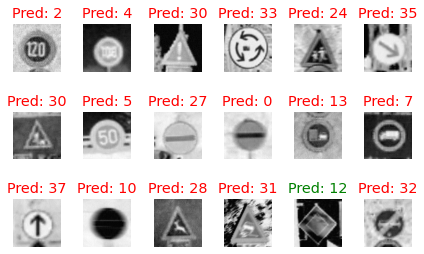

In [ ]:
### Illustrate attacked images
delta = pgd_linf(model, X, y, epsilon=0.1, alpha=1e-2, num_iter=40)
yp = model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
print("model error pgd_linf:", epoch_adversarial(model, test_loader, pgd_linf, 0.1, 1e-2, 40)[0])

model error pgd_linf: 0.9926020408163265


### 2.3 Targeted attack using Projected Gradient Descent (pgd_linf_targ)
Using the function pgd_linf_targ(), which aims to maximize logit of the target class y_targ and minimize logit of the true class y. 

I choose target class 2 = "Speed Limit 30".

In [ ]:
def pgd_linf_targ(model, X, y, epsilon, alpha, num_iter):
    # I got some error when I tried to print the model accuracy, so decided to change the code and set y_target=1
    #y_targ = 1 "speed limit 30" 
    y_targ = 1

    """ Construct targeted adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        yp = model(X + delta)
        loss = (yp[:,y_targ] - yp.gather(1,y[:,None])[:,0]).sum()
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

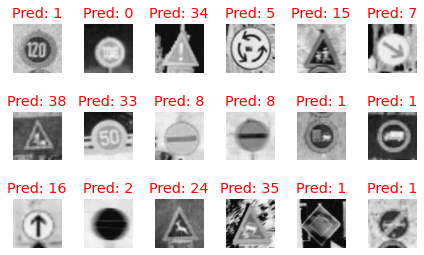

In [ ]:
delta = pgd_linf_targ(model, X, y, epsilon=0.2, alpha=1e-2, num_iter=40)
yp = model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
print("model error pgd_linf_targ:", epoch_adversarial(model, test_loader, pgd_linf_targ, 0.1, 1e-2, 40)[0])

model error pgd_linf_targ: 0.9997448979591836


### 2.4 Targeted attack using Projected Gradient Descent (pgd_linf_targ2)

using the function pgd_linf_targ2(), which aims to maximize logit of the target class y_targ and minimize logit of all the other classes y'. 

In [ ]:
def pgd_linf_targ2(model, X, y, epsilon, alpha, num_iter):
    #y_targ = 1 "speed limit 30"
    y_targ = 1
    """ Construct targeted adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        yp = model(X + delta)
        loss = 2*yp[:,y_targ].sum() - yp.sum()
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

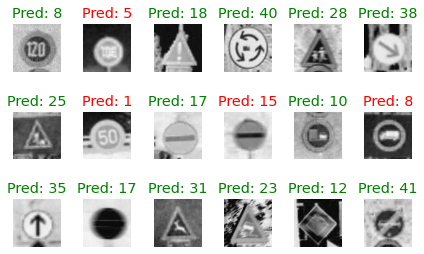

In [ ]:
delta = pgd_linf_targ2(model, X, y, epsilon=0.2, alpha=1e-2, num_iter=40)
yp = model(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
print("model error pgd_linf_targ2:", epoch_adversarial(model, test_loader, pgd_linf_targ2, 0.1, 1e-2, 40)[0])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


model error pgd_linf_targ2: 0.3377551020408163
